# Best-first search

Best-First (BF) search enumerates paths until finding the solution, prioritizing those paths with minimum  cost ($f$) and avoiding cycles.  

BF generalises A* allowing the use of any evaluation (heuristic) function, not necessarily $f = g + h$

A well-known instance of BFS is the greedy search where $f = h$

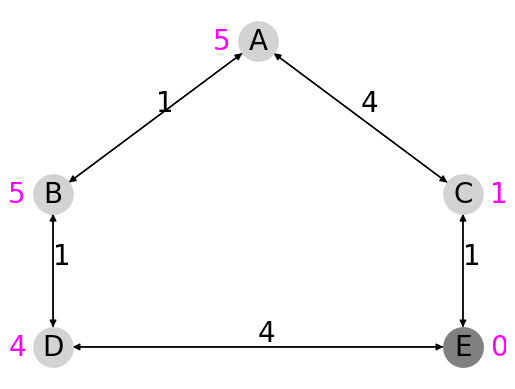

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','D'],'C':['A','E'],'D':['B','E'],'E':['C','D']}
W={('A','B'): 1, ('B','A'): 1, ('A', 'C'): 4, ('C','A'): 4, ('C','E'): 1, ('E','C'): 1, ('B','D'): 1, ('D','B'): 1, ('D','E'): 4, ('E','D'): 4}
h={"A": 5, "B": 5, "C": 1, "D": 4, "E": 0}
lab_h = {}
for i in h: lab_h[i] = str(h[i])
nxG=nx.DiGraph(G)
nx.set_edge_attributes(nxG, values = W, name = 'weight')
source='A'
Target=['E']
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
pos_h = {'A': (18.25, 300), 'B': (8.25, 200), 'C': (31.75, 200), 'D': (8.25, 100), 'E': (31.75, 100)}
nx.draw_networkx_edge_labels(nxG, pos=pos_nodes,edge_labels=W,font_size=20,
  horizontalalignment="left",verticalalignment="bottom",rotate=False, label_pos=0.5)
nx.draw_networkx_labels(nxG, pos_h, labels=lab_h, font_size=20, font_color="magenta")
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
nx.draw_networkx_nodes(nxG,pos=pos_nodes, nodelist=Target, node_color='gray', node_size=800)

## BF algorithm
BF(G, source, f)  
> Open = InitHeap(source,f(source))  
> Closed = $\emptyset$  
> while Open $\neq \emptyset$
>> s = Pop(Open)  
>> if Target(s) return s  
>> Closed = Closed $\cup$ $\{s\}$  
>> for n $\in$ Adjacents(G,s)  
>>>  $x = f_n$  
>>>  if n $\notin$ Closed  
>>>>   if n $\notin$ Open  
>>>>>    Push(Open,n,$f_n$)  
>>>>   else
>>>>>    x = Open[n]  
>>>>>    if $f_n$ < x
>>>>>>    Update(Open,n,$f_n$)  
>>>  else // n $\in$ Closed  
>>>>   x = Closed[n]  
>>>>   if $f_n$ < x  
>>>>>    Delete(Closed[n])  
>>>>>    Push(Open,n,$f_n$)  
> return NULL

### BF search implementation returning the target node that was reached

In [5]:
import heapq
# G is a graph represented as an adjancency list
# W is a dictionary that for each pair of nodes as a tuple returns their cost
# source is the label (string) of the source node
# target is the list of target nodes
# f is an evaluation function
def bf(G, W, source, Target, f):
  fn = f[source]
  Openh = []; heapq.heappush(Openh,(fn,source)); 
  Opend = {}; Opend[source] = fn
  Closed = {}
  while Openh != []:
    (fs,s) = heapq.heappop(Openh); del Opend[s]
    if s in Target:
      return s
    Closed[s] = fs
    for n in G[s]:
      fn = f[n]
      if n not in Closed:
        if n not in Opend:
          heapq.heappush(Openh,(fn,n)); Opend.update({n: fn})
        else:
          ofn = Opend[n]
          # Existing node with better fn -> update
          if fn < ofn:
            Opend[n] = fn
            i = Openh.index((ofn,n))
            Openh[i] = (fn,n)
            heapq._siftdown(Openh,0,i)
      else:
        ofn = Closed[n]
        # Existing node with better fn -> update
        if fn < ofn:
          del Closed[n]
          heapq.heappush(Openh,(fn,n)); Opend.update({n: fn})

# Greedy search as f = h          
print(bf(G,W,source,Target,h))

E


### BFS implementation graphically showing the sequence of nodes visited

E


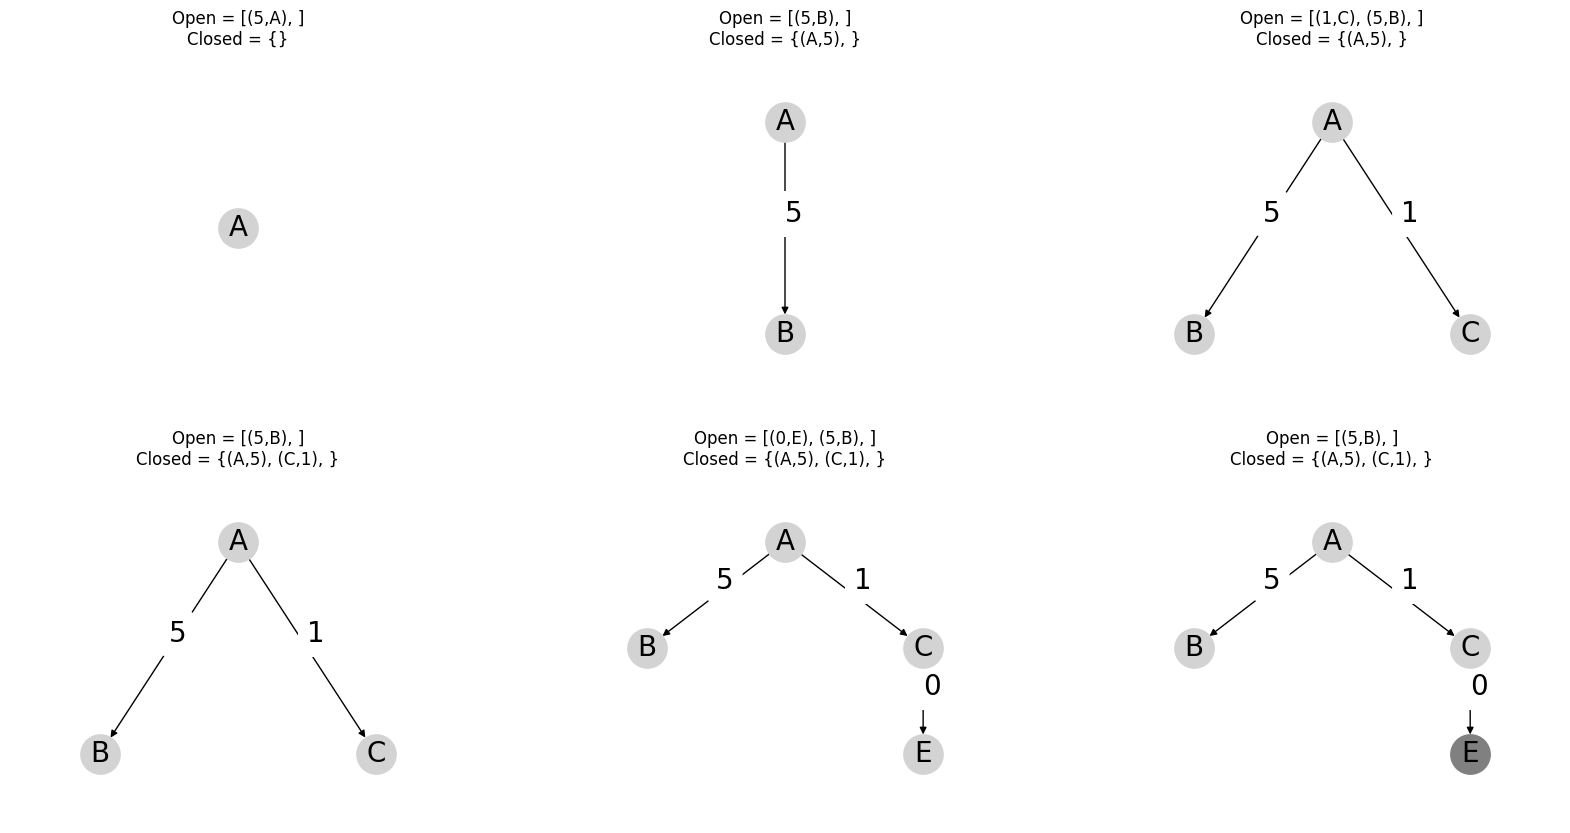

In [6]:
import matplotlib.pyplot as plt

nrows=2; ncols=3
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
axes = iter(fig.axes)

def draw_graph(DG, DW, source, Open, Closed, target=[]):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  ax.margins(0.25,0.25)
  title="Open = ["
  for (f,n) in Open:
    title += "(" + str(f) + "," + n + "), " 
  title += "]\n"
  title += "Closed = {"
  for n in Closed:
    fn = Closed[n]
    title += "(" + n + "," + str(fn) + "), "
  title += "}"
  ax.set_title(title) 
  #ax.set_title("Open = "+str(Open)+"\n"+"Closed = "+str(Closed))
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG, prog='dot', root=source)
  nx.draw(nxDG, pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_edge_labels(nxDG, pos=pos_nodes, edge_labels=DW, label_pos=0.5, font_size=20, 
    horizontalalignment="left",verticalalignment="bottom", ax=ax, rotate=False)
  nx.draw_networkx_nodes(nxDG, pos=pos_nodes, nodelist=target, node_color='gray', node_size=800)

import heapq
# G is a graph represented as an adjancency list
# W is a dictionary that for each pair of nodes as a tuple returns their cost
# source is the label (string) of the source node
# target is the list of target nodes
def bf(G, W, source, Target, f):
  fn = f[source]
  Openh = []; heapq.heappush(Openh,(fn,source)); 
  Opend = {}; Opend[source] = fn
  Closed = {}
  DG = {source:[]}
  DW = {}
  draw_graph(DG, DW, source, Openh, Closed)
  while Openh != []:
    (fs,s) = heapq.heappop(Openh); del Opend[s[0]]
    if s[0] in Target:
      draw_graph(DG, DW, source, Openh, Closed, [s])
      return s
    Closed[s] = fs
    Adj = DG[s]
    for n in G[s[0]]:
      fn = f[n]
      if n not in Closed:
        if n not in Opend:
          Opend.update({n: fn})
          while n in DG: n+="'"
          heapq.heappush(Openh,(fn,n)); 
          Adj.append(n); DG[s]=Adj; DG.update({n:[]}); DW.update({(s,n):fn})
        else:
          ofn = Opend[n]
          # Existing node with better fn -> update
          if fn < ofn:
            Opend[n] = fn
            while n in DG: n+="'"
            if len(n)>1: n=n[:-1]
            i = Openh.index((ofn,n))
            n+="'"
            Openh[i] = (fn,n)
            heapq._siftdown(Openh,0,i)
            Adj.append(n); DG[s]=Adj; DG.update({n:[]}); DW.update({(s,n):fn})
      else:
        ofn = Closed[n]
        # Existing node with better fn -> update
        if fn < ofn:
          del Closed[n]
          heapq.heappush(Openh,(fn,n)); Opend.update({n: fn})
      draw_graph(DG, DW, source, Openh, Closed)
          
print(bf(G,W,source,Target,h))

### Optimality and complexity

**Completeness**  
BF search with graph search is complete in finite graphs, but BF search with tree search may be incomplete depending on the evaluation function.  

**Optimality**  
In general, BF search is suboptimal, but it depends on the evaluation function.  

**Complexity**  
The same as UCS/Dijkstra, the temporal and spatial cost are $O(b^{m+1})$.
